# **Feature Transformation Methods** 

These involve numerical transformations methods and ways to encode non-numerical variables. These techniques are applied before implementing a machine learning model. They include and are not limited to: scaling, binning, logarithmic transformations, hashing and one hot encoding. These methods typically improve performance, runtime and interpretability of a model.

You may be thinking, “we already have our data in numbers. Why would we want to change those?” Well, first of all, that is a great question. We’ll dive deep into the “why we do this” throughout this lesson. To put it simply, we do this to help our model better compare features and, most importantly, improve our model’s accuracy and interpretability.

In [35]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr
import seaborn as sns

from src.config import CREDIT_RISK_DATA_DIR

In [36]:
os.chdir(CREDIT_RISK_DATA_DIR)

df = pd.read_csv("credit_risk_dataset.csv")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## **Centering**

Data centering involves subtracting the mean of a data set from each data point so that the new mean is 0. This process helps us understand how far above or below each of our data points is from the mean.

We will find the mean of our feature, create one line of code to center our data, and then plot the centered data. 


<Axes: xlabel='person_age', ylabel='Count'>

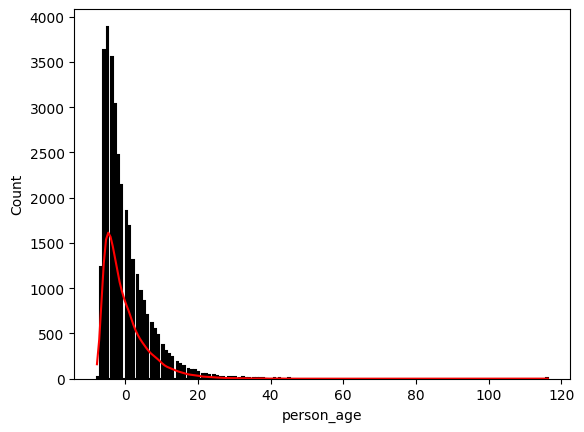

In [38]:
distance = df["person_age"]

# get the mean of your feature
mean_dis = np.mean(distance)

# take our distance array and subtract the mean_dis, this will create a new series with the results
centered_dis = distance - mean_dis

# visualize your new list
sns.histplot(centered_dis, kde=True, color="red", linewidth=1.5, edgecolor="black")

## **Standardising (Z-Score Normalisation)**

Now we’ll take that concept one step further and discuss standardizing our data. Standardization (also known as Z-Score normalization) is when we center our data, then divide it by the standard deviation. Once we do that, our entire data set will have a mean of zero and a standard deviation of one. This allows all of our features to be on the same scale. This step is critical because some machine learning models will treat all features equally regardless of their scale. You’ll definitely want to standardize your data in the following situations, before:

- Principal Component Analysis
- Using any clustering or distance based algorithm (think KMeans or DBSCAN)
- KNN
- Performing regularization methods like LASSO and Ridge

In [39]:
distance = df["person_age"]

# find the mean of our feature
distance_mean = np.mean(distance)

# find the standard deviation of our feature
distance_std_dev = np.std(distance)

# this will take each data point in distance subtract the mean, then divide by the standard deviation
distance_standardized = (distance - distance_mean) / distance_std_dev

# print the mean
print(np.mean(distance_standardized))

# print the standard deviation
print(np.std(distance_standardized))

0.0
1.0


Now that we understand the mathematics behind a standard scaler let’s quickly implement it with the `sklearn` library. We will begin by importing our `StandardScaler` library from `sklearn.preprocessing`.

We instantiate the `StandardScaler` by setting it to a variable called scaler which we can then use to transform our feature. 

<Axes: xlabel='person_age_scaled', ylabel='Count'>

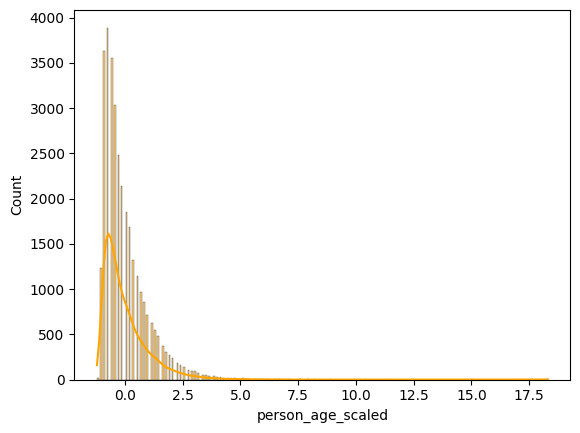

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df["person_age_scaled"] = scaler.fit_transform(df[["person_age"]])
sns.histplot(df["person_age_scaled"], kde=True, color="orange", linewidth=0.2, edgecolor="black")

<Axes: xlabel='person_age_scaled', ylabel='Density'>

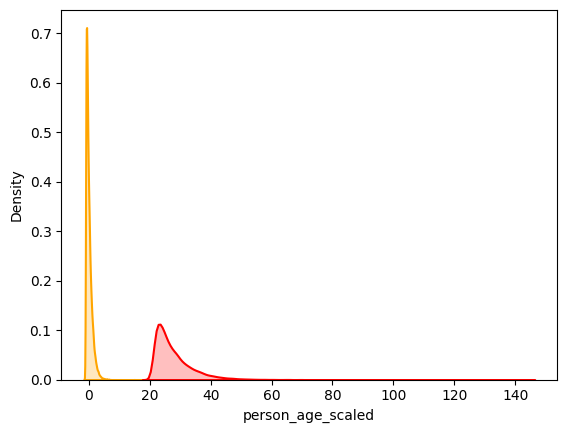

In [41]:
sns.kdeplot(df["person_age_scaled"], color="orange", linewidth=1.5, fill=True)
sns.kdeplot(df["person_age"], color="red", linewidth=1.5, fill=True)

## **Min-Max Normalization**

Another form of scaling your data is to use a min-max normalization process. The name says it all, we find the minimum and maximum data point in our entire data set and set each of those to 0 and 1, respectively. Then the rest of the data points will transform to a number between 0 and 1, depending on its distance between the minimum and maximum number. We find that transformed number by taking the data point subtracting it from the minimum point, then dividing by the value of our maximum minus minimum.

One thing to note about min-max normalization is that this transformation does not work well with data that has extreme outliers. You will want to perform a min-max normalization if the range between your min and max point is not too drastic.

Another thing to note is that Z-scores do not preserve meaningful zeros, where min-max normalization will (assuming that zero is the minimum value in your dataset -- you can also simply divide by the max, if this is not the case). This may give better conditioning to those models which are able to utilize meaningful zeros.

<Axes: xlabel='person_age_min_max', ylabel='Count'>

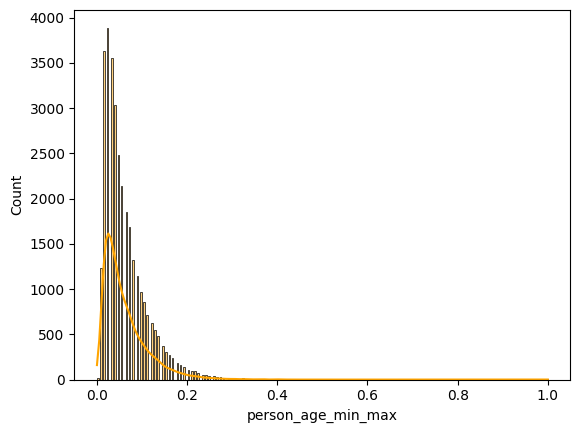

In [42]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df["person_age_min_max"] = min_max_scaler.fit_transform(df[["person_age"]])

sns.histplot(df["person_age_min_max"], kde=True, color="orange", linewidth=0.5, edgecolor="black")

<Axes: xlabel='person_age_scaled', ylabel='Density'>

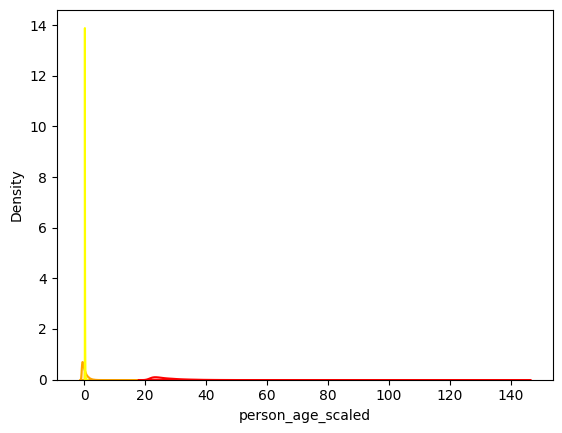

In [43]:
sns.kdeplot(df["person_age_scaled"], color="orange", linewidth=1.5, fill=True)
sns.kdeplot(df["person_age_min_max"], color="yellow", linewidth=1.5, fill=True)
sns.kdeplot(df["person_age"], color="red", linewidth=1.5, fill=True)

## **Binning**

Binning data is the process of taking numerical or categorical data and breaking it up into groups. We could decide to bin our data to help capture patterns in noisy data. There isn’t a clean and fast rule about how to bin your data, but like so many things in machine learning, you need to be aware of the trade-offs.

You want to make sure that your bin ranges aren’t so small that your model is still seeing it as noisy data. Then you also want to make sure that the bin ranges are not so large that your model is unable to pick up on any pattern. It is a delicate decision to make and will depend on the data you are working with.

If your data is heavily skewed, binning helps control that. It helps if you want to get an idea about how much of your data is distributed where, but the bin sizes need to be chosen correctly. The other reason for binning is interpretability, eg in loan applications you might have different segments for different age groups.

In [44]:
# Define the bins and labels
bins = [0, 12, 18, 35, 60, 100]
labels = ["Child", "Teen", "Young Adult", "Adult", "Senior"]

# Create a new column 'age_group' with the binned age data
df["person_age_group"] = pd.cut(df["person_age"], bins=bins, labels=labels, right=False)

<Axes: xlabel='person_age_group', ylabel='count'>

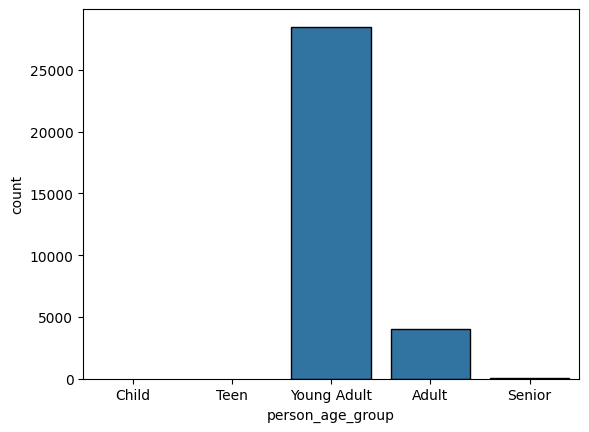

In [45]:
sns.countplot(x="person_age_group", data=df, edgecolor="black")

<Axes: xlabel='person_age_group', ylabel='person_age'>

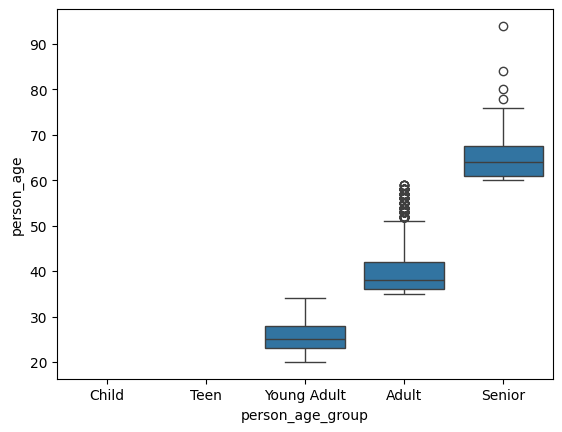

In [46]:
sns.boxplot(x="person_age_group", y="person_age", data=df)

### **Weights of Evidence (WoE) Encoding** 

Weight of Evidence (WoE) can be used to understand the predictive power of an independent variable. WoE helps to understand if a particular class of an independent variable has a higher distribution of good or bad. Weight of Evidence (WoE) is a statistical transformation of a categorical or numerical variable that measures the strength of association between a predictor (independent variable) and a binary target variable (dependent variable). 

It is widely used in credit risk modeling, particularly for building scorecards (e.g., application or behavioral scorecards), because it provides a monotonic transformation and is easy to interpret particularly logistic regression.

For each bin or category of a variable, WoE is defined as:

$\text{WoE}_i=\ln(\Large\frac{\text{Good\%}_i}{\text{Bad\%}_i})$
- Proportion of good (non-default) observations in bin: $\text{Good\%}_i=\Large{\frac{\text{Good Count}_i}{\text{Total Good Count}}}$
- Proportion of bad (default) observations in bin: $\text{Bad\%}_i=\Large\frac{\text{Bad Count}_i}{\text{Total Bad Count}}$

Divide the variable into discrete bins (e.g., intervals for numerical variables or categories for categorical variables). Ensure each bin has a meaningful number of observations.
- Positive WoE indicates a higher proportion of "good" customers in the bin.
- Negative WoE indicates a higher proportion of "bad" customers in the bin.



| Age Group | Good (1) | Bad (0) | WOE | Information value |
|---|---|---|---|---|
| 18-25 | 1000 | 170 | -0.58 | 0.06 |
| 25-35 | 1000 | 230 | -0.89 | 0.17 |
| 36-45 | 1800 | 95 | 0.59 | 0.06 |
| 46-55 | 1602 | 106 | 0.36 | 0.02 |
| 56-70 | 1900 | 92 | 0.67 | 0.09 |
| **Total** | **7302** | **693** | | **0.41** |

During EDA, we often perform binning of categorical and continuous variables. Assume, in a dataset, we have Age as a continuous variable and Good/Bad Loan as categorical target variable. We might be interested to find what could be the logical separations to create bins for different age groups. First, we create a higher number of age groups and then calculate WOE for each group. If there is a monotonic trend of WOE values (either descending or ascending), then we can confirm that our bins have a general trend. If it’s not monotonic, then we need to compress the bins to form new groups and need to check the WOE values again. Thus, using WOE, we can create logical bins for further data analysis.

In our first attempt, we created 5 bins for continuous variable ‘Age’. But no monotonic trend can be seen here. So, in the next attempt, we compressed two groups and created 3 bins, as shown below. Now we can see a monotonic trend (decrease in WOE value) for different classes of ‘Age’. We can follow the same approach to group ordinal and nominal categorical variables having higher number of classes into lesser number of bins.

| Age Group | Good (1) | Bad (0) | WOE | Information Value |
|---|---|---|---|---|
| 18-35 | 2000 | 400 | -0.75 | 0.23 |
| 36-55 | 3402 | 201 | 0.47 | 0.08 |
| 56-70 | 1900 | 92 | 0.67 | 0.09 |
| **Total** | **7302** | **693** | | **0.40** |

In the above example we have converted continuous variable ‘Age’ into a categorical variable for performing EDA. We can further replace those categories with their WOE values and then discrete variable ‘Age’ can be used in our logistic regression model for binary prediction. It helps the model to become more stable, and a small change in ‘Age’ will not impact the model. But it comes for a price.

You can notice an interesting fact here. After reducing the number of bins from 5 to 3, overall Information Value (IV) of ‘Age’ variable also reduced a bit. Whenever we transform a continuous variable into a categorical variable or reduce the number of classes of a categorical variable using binning, we also lose some predictive power of that variable.

During Binary Classification using Logistic Regression, it’s required to transform any categorical variables into numeric variables. One Hot Encoding and Label Encoding both have some dis-advantages. I am not going into too many details, but one disadvantage you may think of, when a nominal variable has too many classes and performing One Hot Encoding may lead to the Curse of Dimensionality.

WOE score can be used to transform the categorical variable into a numeric variable. Calculated WOE values of different classes can be used to replace their actual values. Hence there is no requirement of performing any separate encoding for model building.

Missing values can also be grouped (say, ‘Unknown’ class) and can be imputed with the computed WoE value.

## **Natural Log Transformation**

This transformation works well for right-skewed data and data with large outliers. After we log transform our data, one large benefit is that it will allow the data to be closer to a “normal” distribution. It also changes the scale so our data points will drastically reduce the range of their values.

Using a log transformation in a machine learning model will require some extra interpretation. For example, if you were to log transform your data in a linear regression model, our independent variable has a multiplication relationship with our dependent variable instead of the usual additive relationship we would have if our data was not log-transformed.
Keep in mind, just because your data is skewed does not mean that a log transformation is the best answer. You would not want to log transform your feature if:
- You have values less than 0. The natural logarithm (which is what we’ve been talking about) of a negative number is undefined.
- You have left-skewed data. That data may call for a square or cube transformation.
- You have non-parametric data

c:\Users\mervedosa\OneDrive - Deloitte (O365D)\Documents\Deloitte\Non-Billable\Azure\crm_codelib\UK SRTA CRM Credit Library\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


<Axes: xlabel='person_income_log', ylabel='Count'>

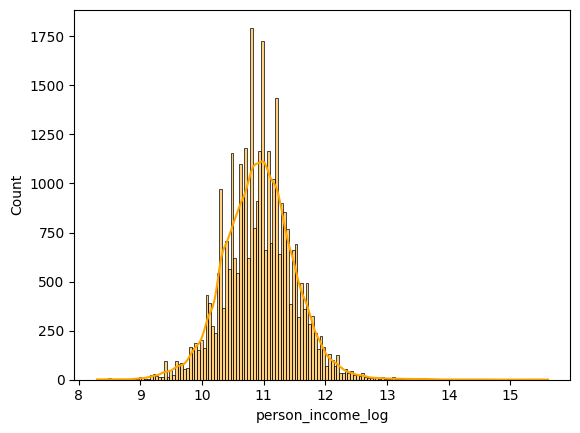

In [47]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log1p, validate=True)

df["person_income_log"] = log_transformer.transform(df[["person_income"]])

sns.histplot(df["person_income_log"], kde=True, color="orange", linewidth=0.5, edgecolor="black")

<Axes: xlabel='person_income_log', ylabel='Density'>

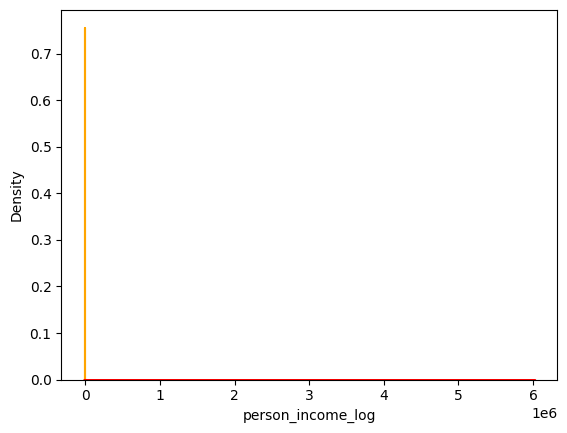

In [48]:
sns.kdeplot(df["person_income_log"], color="orange", linewidth=1.5, fill=True)
sns.kdeplot(df["person_income"], color="red", linewidth=1.5, fill=True)

## **Power Transformation**

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, `PowerTransformer` supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood. Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data. By default, zero-mean, unit-variance normalization is applied to the transformed data.

### **Box-Cox Transformation**

This is a family of power transformations. It transforms the data using the formula:  $y' = \frac{y^\lambda - 1}{\lambda}$ for $λ ≠ 0$, and $y' = \ln(y)$ for $λ = 0$. The parameter $λ$ is estimated to maximise the normality of the transformed data.

Use this when your data is skewed, but you're not sure which specific transformation is best. The Box-Cox transformation automatically finds the optimal power transformation to achieve approximate normality. It's particularly useful for data that is positively skewed. It requires strictly positive data.

<Axes: xlabel='person_income_bc', ylabel='Count'>

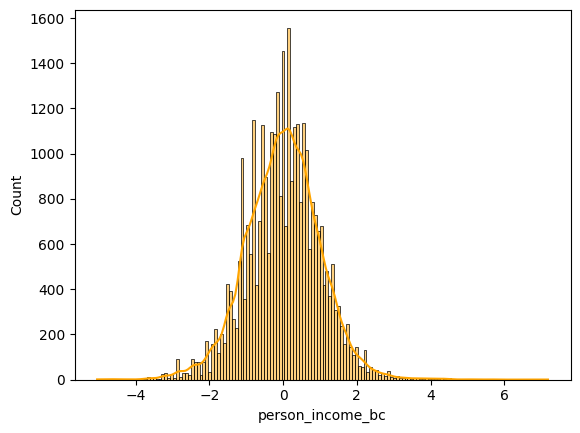

In [49]:
from sklearn.preprocessing import PowerTransformer

bc = PowerTransformer(method="box-cox")

df["person_income_bc"] = bc.fit_transform(df[["person_income"]])

sns.histplot(df["person_income_bc"], kde=True, color="orange", linewidth=0.5, edgecolor="black")

### **Yeo-Johnson Transformation**

This is a more flexible power transformation that handles both positive and negative data. It uses a different formula depending on whether the data is positive or negative:

For $y \ge 0$: $y' = \frac{(y+1)^\lambda - 1}{\lambda}$ (similar to Box-Cox)

For $y < $0: $y' = \frac{-( (-y+1)^{2-\lambda} - 1)}{2-\lambda}$

Use this when your data is skewed and may contain both positive and negative values. It's a more robust alternative to Box-Cox when dealing with data that includes zero or negative values.

<Axes: xlabel='person_income_yj', ylabel='Count'>

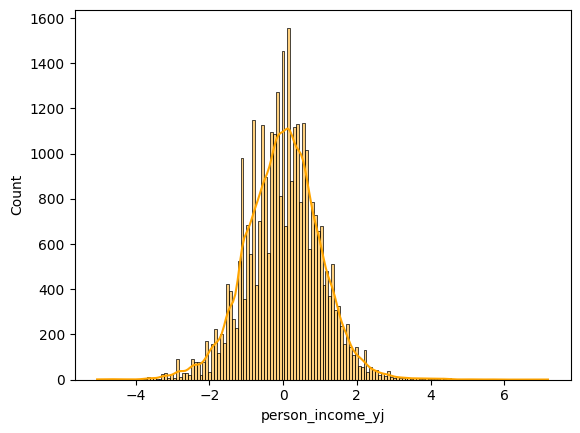

In [50]:
from sklearn.preprocessing import PowerTransformer

yj = PowerTransformer(method="yeo-johnson")

df["person_income_yj"] = yj.fit_transform(df[["person_income"]])

sns.histplot(df["person_income_yj"], kde=True, color="orange", linewidth=0.5, edgecolor="black")

The power transform is useful as a transformation in modeling problems where homoscedasticity and normality are desired. Below are examples of Box-Cox and Yeo-Johnwon applied to six different probability distributions: Lognormal, Chi-squared, Weibull, Gaussian, Uniform, and Bimodal.

![image](images/power_transformations.png)

## **Ordinal Encoding**

We mentioned already that ordinal data is data that does have order and a hierarchy between its values. We need to convert these labels into numbers, and we can do this with two different approaches. First, we can do this by creating a dictionary where every label is the key and the new numeric number is the value. 

In [51]:
df["person_age_group"] = pd.Categorical(df["person_age_group"], categories=labels, ordered=True)
df["person_age_group"] = df["person_age_group"].cat.rename_categories(
    ["Child", "Teen", "Young Adult", "Adult", "Senior"]
)
df["person_age_group"].unique()

['Young Adult', NaN, 'Adult', 'Senior']
Categories (5, object): ['Child' < 'Teen' < 'Young Adult' < 'Adult' < 'Senior']

The second approach we will show is how to utilize the `sklearn.preprocessing` library `OrdinalEncoder`. We follow a similar approach: we set our categories as a `list`, and then we will `.fit_transform` the values in our feature condition. We’ll also note, this method will not work if your feature has NaN values. Those need to be addressed prior to running `.fit_transform`. 

In [52]:
from sklearn.preprocessing import OrdinalEncoder

df["person_age_group"] = df["person_age_group"].fillna(df["person_age_group"].mode()[0])

ordinal_features_dict = {
    "person_age_group": ["Child", "Teen", "Young Adult", "Adult", "Senior"],
}

for feature, labels in ordinal_features_dict.items():
    encoder = OrdinalEncoder(categories=[labels])
    df[f"{feature}_ord"] = encoder.fit_transform(df[[feature]])
    df[f"{feature}_ord"] = df[f"{feature}_ord"].astype("int")
    print(df[f"{feature}_ord"].unique())

[2 3 4]


## **Label Encoding (nominal)**

Now, we can talk about nominal data, and we have to approach this type of data differently than what we did with ordinal data. To prepare this feature, we still need to convert our text to numbers, so let’s do just that.  We will demonstrate two different approaches, with the first one showing how to convert the feature from an object type to a categories type.

```python
for feature in nominal_vars + nominal_cat_vars:
    # convert feature to category type
    df[feature] = df[feature].astype("category")
    # save new version of category codes
    df[f"{feature}_lcode"] = df[feature].cat.codes
```

One more way we can transform this feature is by using `sklearn.preprocessing` and the `LabelEncoder` library. This method will not work if your feature has NaN values. 

```python
from sklearn.preprocessing import LabelEncoder

# create encoder
encoder = LabelEncoder()

for feature in nominal_vars + nominal_cat_vars:
    df[f"{feature}_lcode"] = encoder.fit_transform(df[feature])
```

However, we have created a problem for ourselves and potentially our model. To combat this ordinal assumption our model will make, we should one-hot encode our nominal data, which we will cover in the next section. If the model treats the values categorically (e.g., Decision Trees, Random Forests), label encoding is fine. If the model treats them as continuous numbers (e.g., Linear Regression, Neural Networks), it might cause problems, and one-hot encoding would be better.


## **One-Hot Encoding (nominal low cardinality)**

One-hot encoding is when we create a dummy variable for each value of our categorical feature, and a dummy variable is defined as a numeric variable with two values: 1 and 0. This could be because:
- We have a **nominal categorical variable** (like breed of dog), so it doesn’t really make sense to assign numbers like 0,1,2,3,4,5 to our categories, as this could create an order among the species that is not present.
- We have an **ordinal categorical variable** but we don’t want to assume that there’s equal spacing between categories.

Another way of encoding categorical variables is called One-Hot Encoding (OHE). With OHE, we essentially create a **new binary variable** for each of the categories within our original variable. This technique is useful when managing nominal variables because it encodes the variable without creating an order among the categories.

To perform OHE on a variable within a pandas dataframe, we can use the pandas `get_dummies()` method which creates a binary or “dummy” variable for each category. We can assign the columns to be encoded in the columns parameter, and set the data parameter to the dataset we intend to alter. The `pd.get_dummies()` method will also work on data types other than category.

In [55]:
loan_grade_series = df.loan_grade

df = pd.get_dummies(data=df, columns=["loan_grade"], drop_first=False)
# join the new columns back onto our cars dataframe
df["loan_grade"] = loan_grade_series

df.loan_grade.unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

Notice that when using `pd.get_dummies()`, we are effectively creating a new dataframe that contains a different set of variables to the original dataframe.

By passing in the dataset and column that we want to encode into `pd.get_dummies()`, we have created a new dataframe that contains three new binary variables with values of 1 for `True` and 0 for `False`, which we can view when we scroll to the right in the table. Now we haven’t assigned weighting to our nominal variable. It is important to note that OHE works best when we do not create too many additional variables, as increasing the dimensionality of our dataframe can create problems when working with certain machine learning models.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32581 non-null  int64   
 1   person_income               32581 non-null  int64   
 2   person_home_ownership       32581 non-null  object  
 3   person_emp_length           31686 non-null  float64 
 4   loan_intent                 32581 non-null  object  
 5   loan_amnt                   32581 non-null  int64   
 6   loan_int_rate               29465 non-null  float64 
 7   loan_status                 32581 non-null  int64   
 8   loan_percent_income         32581 non-null  float64 
 9   cb_person_default_on_file   32581 non-null  object  
 10  cb_person_cred_hist_length  32581 non-null  int64   
 11  person_age_scaled           32581 non-null  float64 
 12  person_age_min_max          32581 non-null  float64 
 13  person_age_group

## **Target Encoding (nominal high cardinality)**

Target encoding is a Bayesian encoder used to transform categorical features into hashed numerical values and is sometimes called the mean encoder. This encoder can be utilized for data sets that are being prepared for regression-based supervised learning, as it needs to take into consideration the mean of the target variable and its correlation between each individual category of our feature. In fact, the numerical values of each category is replaced with a blend of the posterior probability of the target given a particular categorical value and the prior probability of the target over all the training data.

Woah, now that was a lot of Bayesian buzzwords. How would it work with our specific color feature? It replaces each color with a blend of the mean price of that car color and the mean price of all the cars. Had it been predicting something categorical, it would’ve used a Bayesian target statistic.

The `TargetEncoder` uses the target mean conditioned on the categorical feature for encoding unordered categories, i.e. nominal categories. This encoding scheme is useful with categorical features with high cardinality, where one-hot encoding would inflate the feature space making it more expensive for a downstream model to process. A classical example of high cardinality categories are location based such as zip code or region. You should use it when there is:

- High-cardinality categorical variables (e.g., ZIP codes, surnames, products).
- Classification problems (e.g., fraud detection, customer retention).
- Reducing feature explosion compared to One-Hot Encoding.

```python
from sklearn.preprocessing import TargetEncoder

target_encoder = TargetEncoder()

for feature in nominal_vars:
    df[f"{feature}_target"] = target_encoder.fit_transform(
        df[[feature]], df.survived
    )
```

## **DateTime Encoding**

Now that we have our feature set up as a datetime object, let’s demonstrate some methods we can utilize to get additional information.

```python
df["month"] = pd.to_datetime(df["Date"]).dt.month
df["year"] = pd.to_datetime(df["Date"]).dt.year
df["day"] = pd.to_datetime(df["Date"]).dt.day
```

## **Outliers** 

Outliers are values that deviate significantly from other values in a data set. They indicate an irregularity in the data pattern.



### **Detection**

Common methods for identifying them include:

1. **For Normal Distributions**: Use empirical relations of Normal distribution (Z-score).
The data points that fall below mean-3*(sigma) or above mean+3*(sigma) are outliers, where mean and sigma are the average value and standard deviation of a particular column.
2. **For Skewed Distributions**: Use Inter-Quartile Range (IQR) proximity rule (Tukey's Rule).
The data points that fall below Q1–1.5 IQR or above the third quartile Q3 + 1.5 IQR are outliers, where Q1 and Q3 are the 25th and 75th percentile of the dataset, respectively. IQR represents the inter-quartile range and is given by Q3 — Q1.
3. **For Other Distributions**: Use a percentile-based approach.



### **Handling**

Once identified, you can decide how to handle outliers based on their impact and the context:

1. **Trimming**: If outliers are due to data entry errors or represent noise unrelated to the analysis, they can be removed. Be cautious: Removing too many points might lead to data bias.
2. **Single or Multiple Imputation**: Imputation is a technique used to fill in values that are considered outliers with other values. Usually, the outlier value is replaced with the median, mean, or mode value.
3. **Caping**: What you do is put a limit on the outliers; above a certain value, all are outliers, and below a certain value, all are outliers.
4. **Discretization**: In the method of outlier detection, we create groups and categorize the outliers into a specific group, making them follow the same behavior as the other points in that group. This approach is often referred to as Binning. Binning is a way of organizing data, especially in outlier detection, where we group similar items together, helping us identify and understand patterns more effectively.
5. **Transform Data**: Apply transformations to reduce the effect of outliers:
    - Logarithmic Transformation: Reduces the impact of large values.
    - Square Root Transformation: Compresses large numbers.
    - Winsorization: Replace outliers with a set percentile (e.g., 1st and 99th percentiles).
6. **Create a Separate Variable**: Create a binary indicator variable for outliers. A new column `is_outlier` can help the model learn if outlier status has predictive value.
7. **Use Robust Models**: Some models are inherently robust to outliers, such as: Tree-based models (e.g., XGBoost, Random Forest), Algorithms that use median-based metrics. For logistic regression or linear regression, consider weighted regression (Assigns less weight to outliers).


After removing the outliers, we check again whether there are still outliers or not.

# **Extra Reading**

https://ai.gopubby.com/best-practices-in-feature-engineering-for-machine-learning-aa9ff3c46982

https://pub.towardsai.net/data-preprocessing-for-effective-machine-learning-models-e6ed0e83e888

https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html
